In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# warning
import warnings
warnings.filterwarnings("ignore")
# load given data
data= pd.read_csv(r'/Users/sreekarsontam/Desktop/liver/doc/liver_patient (1).csv')
data["Dataset"].unique()
data.duplicated().sum()
data = data.drop_duplicates()
data.isnull().sum()
df=data.dropna()
df.isnull().sum()
#changing feature name
df = df.rename({'Dataset': 'Result'}, axis=1) 
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i]).astype(int)
df.Result.value_counts()
df.Result.value_counts()
X = df.drop(labels='Result', axis=1)
#Response variable
y = df.loc[:,'Result']    


In [58]:
from imblearn.combine import SMOTETomek
smk = SMOTETomek(sampling_strategy=1,random_state=42)
x1,y1 = smk.fit_resample(X,y)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x1=scaler.fit_transform(x1)
x1
# now let's evaluate its performance on the test set.
from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef, cohen_kappa_score, accuracy_score, average_precision_score, roc_auc_score,ConfusionMatrixDisplay

In [59]:

#We'll use a test size of 30%. We also stratify the split on the response variable, which is very important to do because there are so few fraudulent transactions.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state=1, stratify=y1)

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay,classification_report
from sklearn.ensemble import VotingClassifier

In [61]:
LogisticRegression = pickle.load(open('/Users/sreekarsontam/Desktop/liver/codes/logisticregression.h5', 'rb'))
DecisionTreeClassifier = pickle.load(open('/Users/sreekarsontam/Desktop/liver/codes/decisiontree.h5', 'rb'))
RandomForest = pickle.load(open('/Users/sreekarsontam/Desktop/liver/codes/randoforest.h5', 'rb'))
SupportVector = pickle.load(open('/Users/sreekarsontam/Desktop/liver/codes/sv.h5', 'rb'))

In [76]:
final_model = VotingClassifier(
    estimators=[('lr', LogisticRegression), ('dc',DecisionTreeClassifier ), ('rf',RandomForest) ], voting='hard')
final_model.fit(X_train, y_train)
 
# predicting the output on the test dataset
predictR= final_model.predict(X_test)

In [77]:
accuracy_score(y_test, predictR)

0.8078602620087336

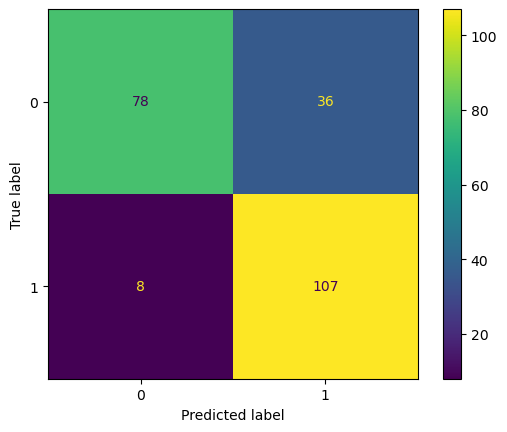

In [64]:
cm=confusion_matrix(y_test,predictR)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [65]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score,f1_score
pd.DataFrame(data=[accuracy_score(y_test, predictR), recall_score(y_test, predictR),
                   precision_score(y_test, predictR), roc_auc_score(y_test, predictR),f1_score(y_test,predictR)], 
                   index=["accuracy", "recall", "precision", "roc_auc_score","f1_score"])

,0
accuracy,0.807860
recall,0.684211
precision,0.906977
roc_auc_score,0.807323
f1_score,0.780000


In [66]:
#model = pickle.load(open('/Users/sreekarsontam/Desktop/liver/codes/votingensemble2.h5', 'rb'))

In [67]:
print(classification_report(y_test,predictR))

              precision    recall  f1-score   support

           1       0.91      0.68      0.78       114
           2       0.75      0.93      0.83       115

    accuracy                           0.81       229
   macro avg       0.83      0.81      0.80       229
weighted avg       0.83      0.81      0.80       229

